# Testing the Spectral Initialization

I noticed that previously, ratings were initialized with a random uniform distribution, which I understand is borrowed from deep learning practice, but I thought in this case we might be able to do a little better. Since the Ekhart-Young theorem gives a closed-form solution to matrix factorization without intercepts, my idea was to use the SVD to initialize the factors as if the intercepts were all zero, and then to perform gradient optimization. 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scoring.matrix_factorization.matrix_factorization import MatrixFactorization
# from scoring.matrix_factorization.normalized_loss import NormalizedLossHyperparameters
from scoring.process_data import preprocess_data

In [ ]:
ratings_df = pd.read_csv("ratings-00009.tsv", sep='\t')
preprocessed_ratings_df = preprocess_data(ratings=ratings_df, notes=None, noteStatusHistory=None, ratingsOnly=True)[1]

In [2]:
preprocessed_ratings_df_sample = pd.read_csv("ratings-00009-preprocessed.tsv", sep='\t')

In [ ]:
all_spec_fitNoteParams, all_spec_fitRaterParams, all_spec_globalIntercept, all_spec_train_loss, all_spec_loss, all_spec_validate_loss = [], [], [], [], [], []
all_unif_fitNoteParams, all_unif_fitRaterParams, all_unif_globalIntercept, all_unif_train_loss, all_unif_loss, all_unif_validate_loss = [], [], [], [], [], []
for _ in range(50):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=10000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams.append(fitNoteParams); all_spec_fitRaterParams.append(fitRaterParams); all_spec_globalIntercept.append(globalIntercept); all_spec_train_loss.append(train_loss); all_spec_loss.append(loss); all_spec_validate_loss.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams.append(fitNoteParams); all_unif_fitRaterParams.append(fitRaterParams); all_unif_globalIntercept.append(globalIntercept); all_unif_train_loss.append(train_loss); all_unif_loss.append(loss); all_unif_validate_loss.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_30k, all_spec_fitRaterParams_30k, all_spec_globalIntercept_30k, all_spec_train_loss_30k, all_spec_loss_30k, all_spec_validate_loss_30k = [], [], [], [], [], []
all_unif_fitNoteParams_30k, all_unif_fitRaterParams_30k, all_unif_globalIntercept_30k, all_unif_train_loss_30k, all_unif_loss_30k, all_unif_validate_loss_30k = [], [], [], [], [], []
for _ in range(10):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=30000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k.append(fitNoteParams); all_spec_fitRaterParams_30k.append(fitRaterParams); all_spec_globalIntercept_30k.append(globalIntercept); all_spec_train_loss_30k.append(train_loss); all_spec_loss_30k.append(loss); all_spec_validate_loss_30k.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k.append(fitNoteParams); all_unif_fitRaterParams_30k.append(fitRaterParams); all_unif_globalIntercept_30k.append(globalIntercept); all_unif_train_loss_30k.append(train_loss); all_unif_loss_30k.append(loss); all_unif_validate_loss_30k.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_dense, all_spec_fitRaterParams_dense, all_spec_globalIntercept_dense, all_spec_train_loss_dense, all_spec_loss_dense, all_spec_validate_loss_dense = [], [], [], [], [], []
all_unif_fitNoteParams_dense, all_unif_fitRaterParams_dense, all_unif_globalIntercept_dense, all_unif_train_loss_dense, all_unif_loss_dense, all_unif_validate_loss_dense = [], [], [], [], [], []
for _ in range(50):
    all_noteIds = preprocessed_ratings_df["noteId"].unique()
    all_raterIds = preprocessed_ratings_df["raterParticipantId"].unique()
    notes_sample = np.random.choice(all_noteIds, size=10000, replace=False)
    raters_sample = np.random.choice(all_raterIds, size=10000, replace=False)
    preprocessed_ratings_df_sample_dense = preprocessed_ratings_df[preprocessed_ratings_df["noteId"].isin(notes_sample) & preprocessed_ratings_df["raterParticipantId"].isin(raters_sample)]

    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_dense.append(fitNoteParams); all_spec_fitRaterParams_dense.append(fitRaterParams); all_spec_globalIntercept_dense.append(globalIntercept); all_spec_train_loss_dense.append(train_loss); all_spec_loss_dense.append(loss); all_spec_validate_loss_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_dense.append(fitNoteParams); all_unif_fitRaterParams_dense.append(fitRaterParams); all_unif_globalIntercept_dense.append(globalIntercept); all_unif_train_loss_dense.append(train_loss); all_unif_loss_dense.append(loss); all_unif_validate_loss_dense.append(validate_loss)

In [ ]:
all_spec_fitNoteParams_30k_dense, all_spec_fitRaterParams_30k_dense, all_spec_globalIntercept_30k_dense, all_spec_train_loss_30k_dense, all_spec_loss_30k_dense, all_spec_validate_loss_30k_dense = [], [], [], [], [], []
all_unif_fitNoteParams_30k_dense, all_unif_fitRaterParams_30k_dense, all_unif_globalIntercept_30k_dense, all_unif_train_loss_30k_dense, all_unif_loss_30k_dense, all_unif_validate_loss_30k_dense = [], [], [], [], [], []
for _ in range(10):
    preprocessed_ratings_df_sample = preprocessed_ratings_df.sample(n=30000, replace=False)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=True, validatePercent=0.30)
    all_spec_fitNoteParams_30k_dense.append(fitNoteParams); all_spec_fitRaterParams_30k_dense.append(fitRaterParams); all_spec_globalIntercept_30k_dense.append(globalIntercept); all_spec_train_loss_30k_dense.append(train_loss); all_spec_loss_30k_dense.append(loss); all_spec_validate_loss_30k_dense.append(validate_loss)
    test_MatrixFactorization = MatrixFactorization()
    fitNoteParams, fitRaterParams, globalIntercept, train_loss, loss, validate_loss = test_MatrixFactorization.run_mf(ratings=preprocessed_ratings_df_sample, useSpectralInit=False, validatePercent=0.30)
    all_unif_fitNoteParams_30k_dense.append(fitNoteParams); all_unif_fitRaterParams_30k_dense.append(fitRaterParams); all_unif_globalIntercept_30k_dense.append(globalIntercept); all_unif_train_loss_30k_dense.append(train_loss); all_unif_loss_30k_dense.append(loss); all_unif_validate_loss_30k_dense.append(validate_loss)

C:\Users\iijof\AppData\Local\Temp\ipykernel_41056\3455664907.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


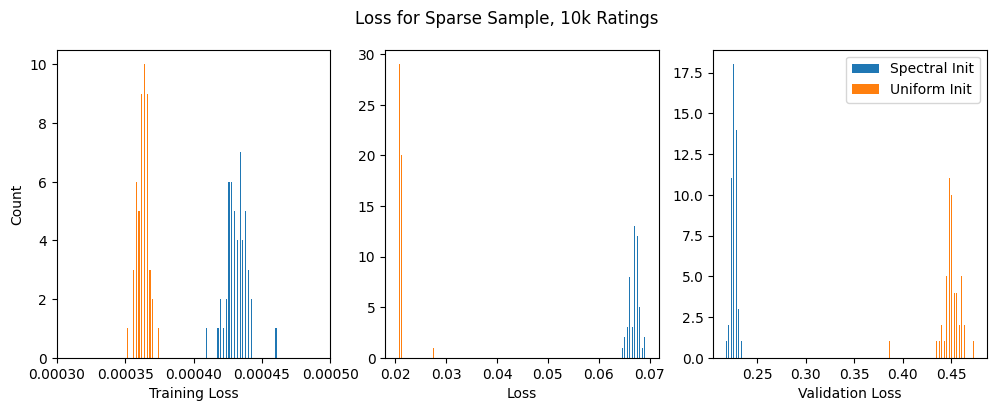

In [94]:
# I accidently sorted all_unif_train_loss

fig, ax = plt.subplots(1,3, figsize=(12,4))

x_min, x_max = 0.0003, 0.0005    # cut out one outlier to the right with the of all_train_loss_unif
bins = np.linspace(x_min, x_max, 100)
ax[0].set_xlim(x_min, x_max)
ax[0].hist([all_spec_train_loss, all_unif_train_loss], bins=bins)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

ax[1].hist([all_spec_loss, all_unif_loss], bins=100)
ax[1].set_xlabel("Loss")

ax[2].hist([all_spec_validate_loss, all_unif_validate_loss], bins=100, label=["Spectral Init", "Uniform Init"])
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Sparse Sample, 10k Ratings")
fig.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_41056\4160637875.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


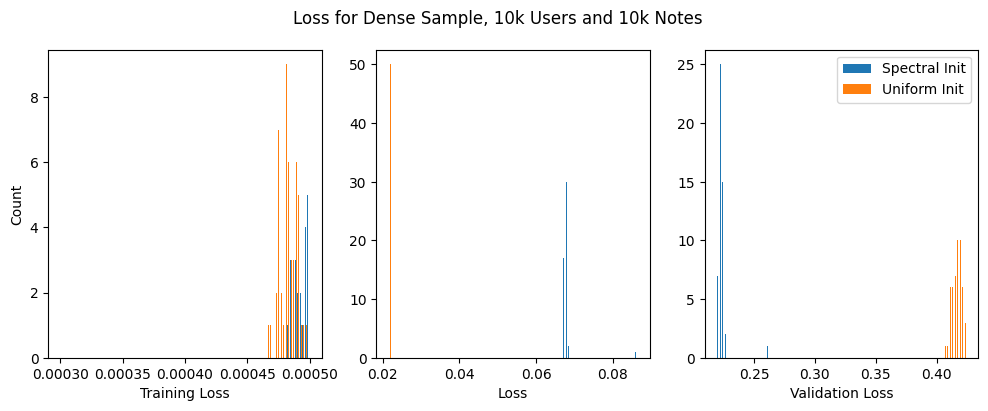

In [98]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist([all_spec_train_loss_dense, all_unif_train_loss_dense], bins=bins)
ax[0].set_xlabel("Training Loss")
ax[0].set_ylabel("Count")

ax[1].hist([all_spec_loss_dense, all_unif_loss_dense], bins=100)
ax[1].set_xlabel("Loss")

ax[2].hist([all_spec_validate_loss_dense, all_unif_validate_loss_dense], bins=100, label=["Spectral Init", "Uniform Init"])
ax[2].set_xlabel("Validation Loss")
ax[2].legend()

fig.suptitle("Loss for Dense Sample, 10k Users and 10k Notes")
fig.show()

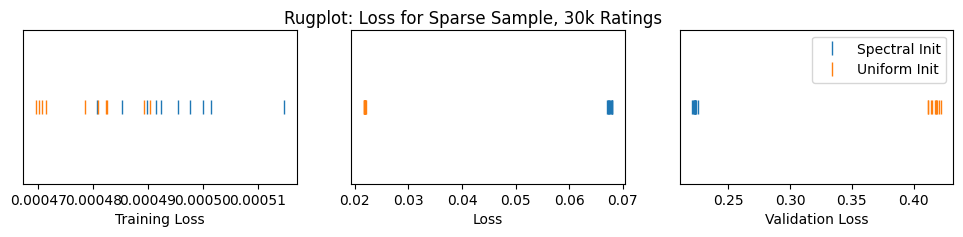

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k, all_unif_train_loss_30k]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k, all_unif_loss_30k]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k, all_unif_validate_loss_30k], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Sparse Sample, 30k Ratings")
plt.show()

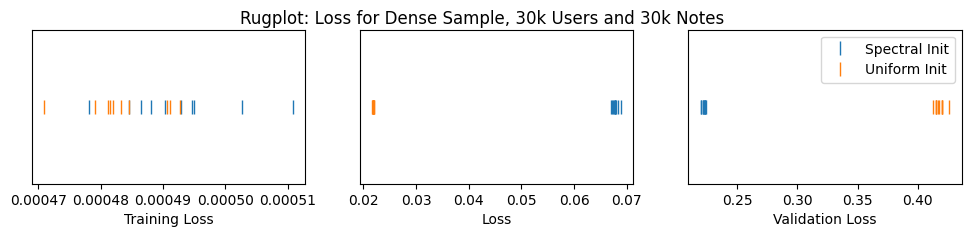

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))

for data in [all_spec_train_loss_30k_dense, all_unif_train_loss_30k_dense]:
    ax[0].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[0].set_xlabel("Training Loss")
ax[0].yaxis.set_visible(False)

for data in [all_spec_loss_30k_dense, all_unif_loss_30k_dense]:
    ax[1].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10)
ax[1].set_xlabel("Loss")
ax[1].yaxis.set_visible(False)

for data, label in zip([all_spec_validate_loss_30k_dense, all_unif_validate_loss_30k_dense], ["Spectral Init", "Uniform Init"]):
    ax[2].plot(data, np.zeros_like(data) + 0.01, '|', markersize=10, label=label)
ax[2].set_xlabel("Validation Loss")
ax[2].legend()
ax[2].yaxis.set_visible(False)

fig.suptitle("Rugplot: Loss for Dense Sample, 30k Users and 30k Notes")
plt.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_41056\814593225.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


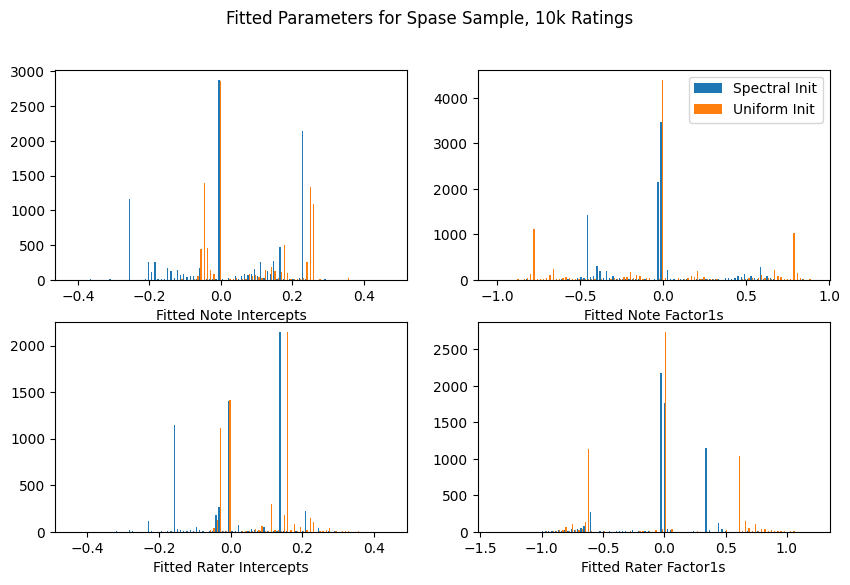

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist([all_spec_fitNoteParams[0]["internalNoteIntercept"], all_unif_fitNoteParams[0]["internalNoteIntercept"]], bins=100)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist([all_spec_fitNoteParams[0]["internalNoteFactor1"], all_unif_fitNoteParams[0]["internalNoteFactor1"]], bins=100, label=["Spectral Init", "Uniform Init"])
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist([all_spec_fitRaterParams[0]["internalRaterIntercept"], all_unif_fitRaterParams[0]["internalRaterIntercept"]], bins=100)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist([all_spec_fitRaterParams[0]["internalRaterFactor1"], all_unif_fitRaterParams[0]["internalRaterFactor1"]], bins=100)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for Spase Sample, 10k Ratings")
fig.show()

C:\Users\iijof\AppData\Local\Temp\ipykernel_41056\3332211367.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


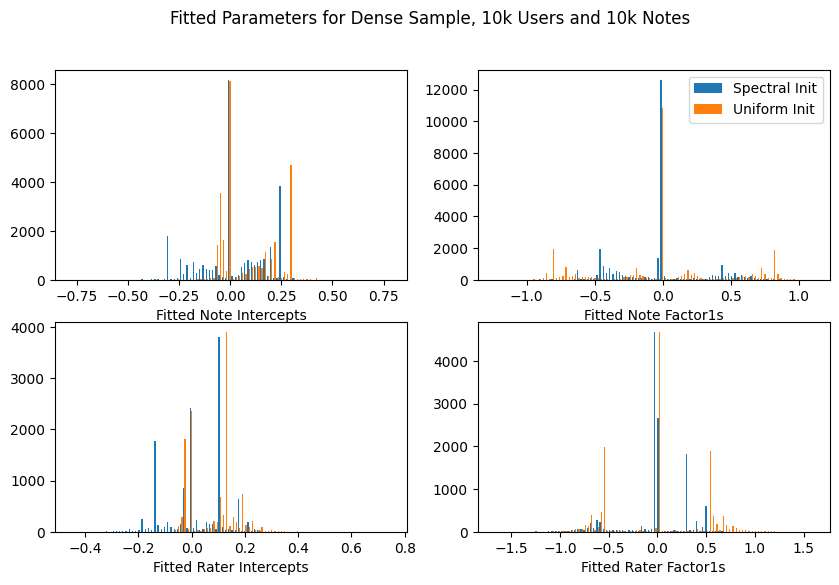

In [124]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

ax[0][0].hist([all_spec_fitNoteParams_dense[0]["internalNoteIntercept"], all_unif_fitNoteParams_dense[0]["internalNoteIntercept"]], bins=100)
ax[0][0].set_xlabel("Fitted Note Intercepts")

ax[0][1].hist([all_spec_fitNoteParams_dense[0]["internalNoteFactor1"], all_unif_fitNoteParams_dense[0]["internalNoteFactor1"]], bins=100, label=["Spectral Init", "Uniform Init"])
ax[0][1].set_xlabel("Fitted Note Factor1s")
ax[0][1].legend()

ax[1][0].hist([all_spec_fitRaterParams_dense[0]["internalRaterIntercept"], all_unif_fitRaterParams_dense[0]["internalRaterIntercept"]], bins=100)
ax[1][0].set_xlabel("Fitted Rater Intercepts")

ax[1][1].hist([all_spec_fitRaterParams_dense[0]["internalRaterFactor1"], all_unif_fitRaterParams_dense[0]["internalRaterFactor1"]], bins=100)
ax[1][1].set_xlabel("Fitted Rater Factor1s")

fig.suptitle("Fitted Parameters for Dense Sample, 10k Users and 10k Notes")
fig.show()

Additionally, in all settings, the spectral initialization always gives a global intercept near $0.6$, very close the the mean rating, which is what I set empty cells in the to-be-decomposed matrix to. The uniform initialization, on the other hand, almost always gives a global intercept near $0.08$. Since the global intercept is initialized to 0, I don't know where this comes from. 

In [ ]:
rater_means = model_data.rating_labels[["noteIndex", "helpfulNum"]].groupby("noteIndex").agg("mean")
note_means = model_data.rating_labels[["noteIndex", "helpfulNum"]].groupby("noteIndex").agg("mean")
model_data_with_means = model_data.rating_labels.join(rater_means, on="raterIndex", rsuffix="RaterMean").join(note_means, on="noteIndex", rsuffix="NoteMean")
ols_coefs = np.linalg.lstsq(model_data_with_means[["helpfulNumRaterMean", "helpfulNumNoteMean"]], model_data_with_means["helpfulNum"])
ols_coefs

In [ ]:
normalizedLossHyperparameters=NormalizedLossHyperparameters(
        globalSignNorm=True, noteSignAlpha=None, noteNormExp=0, raterNormExp=-0.25
      )